In [11]:

%load_ext autoreload
%autoreload 2
Expname='Hypertension Feature Importance SHAP - aged 50-60'
fields=['All']
ages=['50-60']
gends=['All']
diseases={'HT':['I10']}
gend_dict_extcols={'All': ['age_when_attended_assessment_centre_f21003_0_0']}
dis_exc_vars_dict={'HT':''}
iters=2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
df_dict['HD|55-70|All'][0]['HD'].sum()

NameError: name 'df_dict' is not defined

In [25]:
from src.idears.preprocessing.data_proc import *
dp=data_proc()

['setup.sh', '.DS_Store', 'Procfile.txt', 'fig1.png', 'requirements.txt', 'CONTRIBUTING.rst', 'fig2.png', 'UKB ML flow-Page-2.drawio.png', 'pyproject.toml', 'tests', 'chart.png', 'docs', 'README.md', 'setup.py', 'tox.ini', 'AUTHORS.rst', 'setup.cfg', '.ipynb_checkpoints', 'README.rst', 'CHANGELOG.rst', '.git', 'LICENSE.txt', 'data', 'test.ipynb', 'src']


In [28]:
from src.idears.preprocessing.idears_backend import *

['.DS_Store', 'lipid', 'scratch', 'aa', 'ukb', '.ipynb_checkpoints', '.vscode']


In [4]:
df=pd.read_parquet(dp.path+dp.inpfile)

In [20]:
df=pd.read_parquet(dp.path+dp.icd10_file)
df1=dp.split_disease_dfs(df)

In [24]:
#df1['disease'].value_counts().head(30)

In [26]:
df1=dp.create_model_data(depvar='Colon Cancer',icd10s=['C18'],infile='ukb_df_processed.parquet',
	nonull_var='date_of_all_cause_dementia_report_f42018_0_0')

In [27]:
df1['Colon Cancer'].sum()

4503

In [4]:
%load_ext autoreload
%autoreload 2
from src.idears.preprocessing.idears_backend import *
ib=Idears()
df_dict=ib.create_train_test(fields_include_use=fields,ages=ages,gends=gends,diseases=diseases)
df_auc,feats_full=ib.get_aucs_all(df_dict,gend_dict_extcols=gend_dict_extcols,
dis_exc_vars_dict=dis_exc_vars_dict,ages=ages,gends=gends,diseases=diseases,iters=iters)

ModuleNotFoundError: No module named 'preprocessing'

In [ ]:
import sys
sys.path.append('/Users/michaelallwright/Documents/github/ukb/codebase1/src/idears/')
from src.idears.results.charts import charts
ch=charts()

In [1]:
from src.idears.preprocessing.idears_backend import *
ib=idears()


ModuleNotFoundError: No module named 'preprocessing'

In [29]:
ib.df_fields['Modifiable'].value_counts()

1.0    1580
Name: Modifiable, dtype: int64

In [1]:
feats_full

NameError: name 'feats_full' is not defined

FixedFormatter should only be used together with FixedLocator


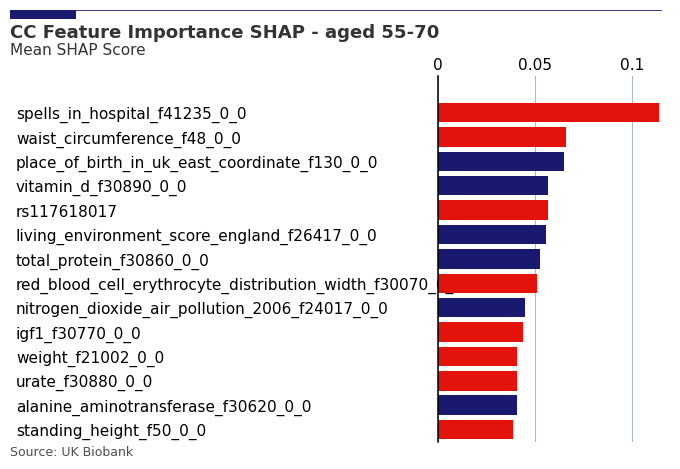

(<Figure size 300x475 with 1 Axes>,
                                              Attribute  mean_shap      corr  \
 5                              standing_height_f50_0_0   0.038999  0.781603   
 200                alanine_aminotransferase_f30620_0_0   0.040764 -0.430579   
 224                                   urate_f30880_0_0   0.041225  0.702914   
 76                                   weight_f21002_0_0   0.041252  0.775122   
 215                                    igf1_f30770_0_0   0.043916  0.701786   
 139     nitrogen_dioxide_air_pollution_2006_f24017_0_0   0.045357 -0.552411   
 171  red_blood_cell_erythrocyte_distribution_width_...   0.051119  0.684084   
 222                           total_protein_f30860_0_0   0.052584 -0.841154   
 163        living_environment_score_england_f26417_0_0   0.055915 -0.700677   
 831                                        rs117618017   0.056682  0.812287   
 225                               vitamin_d_f30890_0_0   0.057248 -0.761098   
 11 

In [36]:
ch.make_econ_bar(df=feats_full,sort_var='mean_shap',err_var=None,recs=None,title=Expname,
		sub_title="Mean SHAP Score",footer="""Source: UK Biobank""",outfile='chart.png',labels_show=False,
		tick_vals_use=[0, 0.05, 0.1, 0.15, 0.2],shrink=True,figsize=(3,16),out=True)